# Food Image classification using CNN 🥩🍕

## Importing main Libs:

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
sns.set_context(context="paper")

In [38]:
np.random.seed(42)
tf.random.set_seed(42)

## Download via this cell:

This dataset is a subset from famous food-101 dataset **(https://www.kaggle.com/datasets/dansbecker/food-101)**, which contains *"steak"* & *"pizza"* images
**(https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip)**

In [2]:
!tree  pizza_steak/

Folder PATH listing
Volume serial number is 78AC-B287
C:\USERS\MATIN\MAKTABKHONE\FOOD-IMAGE-CLASSIFICATION-USING-CNN\FF\PIZZA_STEAK
+---test
¦   +---pizza
¦   ¦   +---.ipynb_checkpoints
¦   +---steak
+---train
    +---pizza
    ¦   +---.ipynb_checkpoints
    +---steak


In [3]:
import os

for dirpath , dirnames , filenames in os.walk("pizza_steak"):
    print(f"There are: {len(dirnames)} directories, {len(filenames)} files in: '{dirpath}'")

There are: 2 directories, 0 files in: 'pizza_steak'
There are: 2 directories, 0 files in: 'pizza_steak\test'
There are: 1 directories, 100 files in: 'pizza_steak\test\pizza'
There are: 0 directories, 3 files in: 'pizza_steak\test\pizza\.ipynb_checkpoints'
There are: 0 directories, 100 files in: 'pizza_steak\test\steak'
There are: 2 directories, 0 files in: 'pizza_steak\train'
There are: 1 directories, 900 files in: 'pizza_steak\train\pizza'
There are: 0 directories, 2 files in: 'pizza_steak\train\pizza\.ipynb_checkpoints'
There are: 0 directories, 900 files in: 'pizza_steak\train\steak'


`Train` : **750** label images🔥<br>
`Test` : **250** label images🔥

## Inspecting the dataset

### Steak

Image shape is: (465, 512, 3)


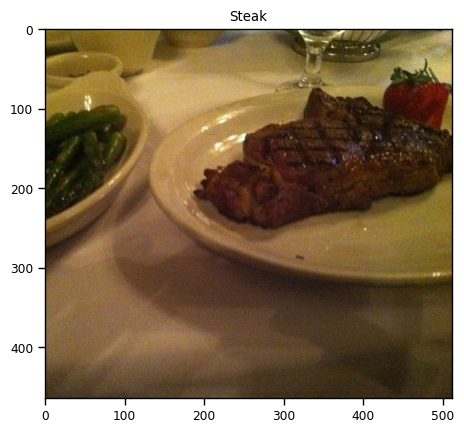

In [4]:
img = mpimg.imread("pizza_steak\\train\\steak\\616809.jpg")
plt.title("Steak")
plt.imshow(img)
print("Image shape is:",img.shape)

### Pizza

Image shape is: (341, 512, 3)


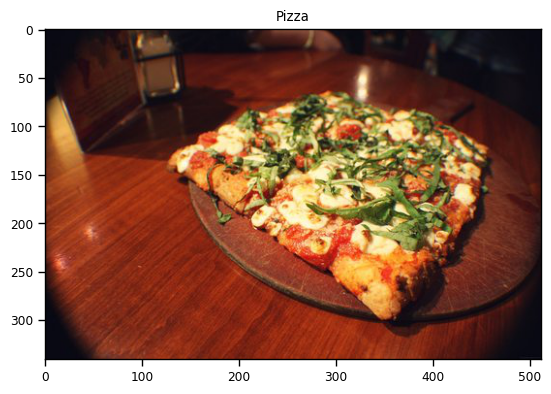

In [5]:
img = mpimg.imread("pizza_steak\\train\\pizza\\307677.jpg")
plt.title("Pizza")
plt.imshow(img)
print("Image shape is:",img.shape)

### Color channel separation

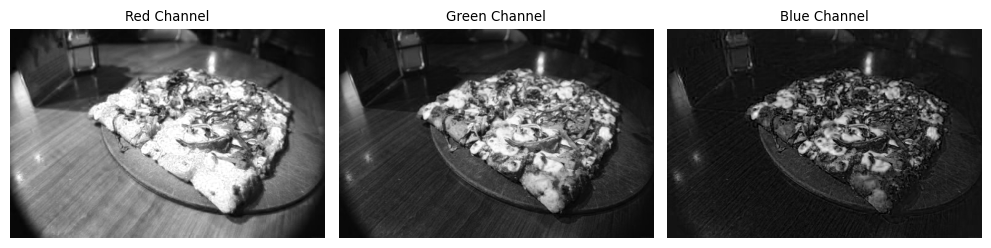

In [6]:
# Split the channels
red_channel = img[:, :, 0]   # Red channel
green_channel = img[:, :, 1] # Green channel
blue_channel = img[:, :, 2]  # Blue channel

# Plotting the channels
plt.figure(figsize=(10, 4))

# Red channel
plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

# Green channel
plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

# Blue channel
plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

# Display the plots
plt.tight_layout()
plt.show()

## Preprocessing

### Data selection & Normalization

In [7]:
#Creating an image generator
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_path = "pizza_steak/train"
val_path = "pizza_steak/test"

#Directing image data to the pipepline
train_data = train_datagen.flow_from_directory(train_path,target_size=(224,224),class_mode="binary",seed=42)
val_data = val_datagen.flow_from_directory(val_path,target_size=(224,224),class_mode="binary",seed=42)

Found 1802 images belonging to 2 classes.
Found 203 images belonging to 2 classes.


## Building CNN model

A convolutional neural network is a regularized type of feed-forward neural network that learns features by itself via filter optimization.

![](docs/CNN.jpg)

### VGG approach

`VGG (Visual Geometry Group)` is a convolutional neural network architecture that was proposed by researchers from the University of Oxford in 2014. It gained popularity and recognition for its simplicity and effectiveness in image classification tasks.


![](docs/tinyvgg.png)

### Architecture
- **Convolutional Layers**: Tiny VGG consists of several convolutional layers. Each layer uses small 3x3 filters, which help in capturing fine details while maintaining a manageable number of parameters.
- **ReLU Activation**: After each convolution, a ReLU (Rectified Linear Unit) activation function is applied to introduce non-linearity into the model.
- **Pooling Layers**: Max pooling layers (usually 2x2) are interspersed between convolutional layers to reduce the spatial dimensions of the feature maps, effectively downsampling the input.
- **Fully Connected Layers**: After the convolutional and pooling layers, the output is flattened and passed through one or more fully connected (dense) layers.
- **Softmax Layer**: The final layer typically uses a softmax activation function to output class probabilities for classification tasks.

Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 35s 528ms/step - accuracy: 0.6473 - loss: 0.6221 - val_accuracy: 0.8276 - val_loss: 0.4006
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 500ms/step - accuracy: 0.8175 - loss: 0.4200 - val_accuracy: 0.8670 - val_loss: 0.3421
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 32s 527ms/step - accuracy: 0.8318 - loss: 0.3858 - val_accuracy: 0.8966 - val_loss: 0.3091
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 482ms/step - accuracy: 0.8619 - loss: 0.3319 - val_accuracy: 0.8818 - val_loss: 0.3058
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 505ms/step - accuracy: 0.8793 - loss: 0.3140 - val_accuracy: 0.8719 - val_loss: 0.2924


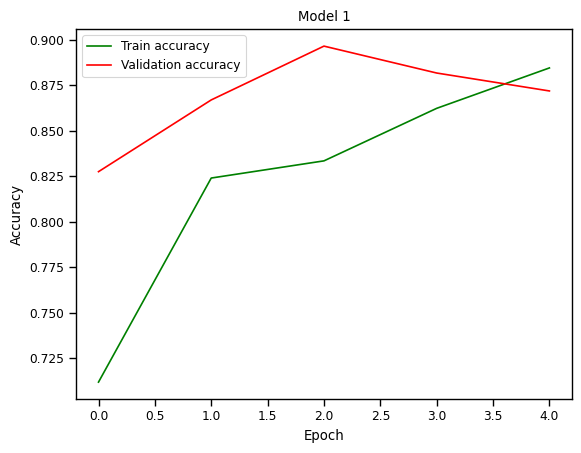

In [9]:
model_1 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    
    
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(0.001),metrics=["accuracy"])
history_1 = model_1.fit(train_data,epochs=5,validation_data=val_data)


# Plot training and validation accuracy
sns.lineplot(x=history_1.epoch, y=history_1.history["accuracy"], c="green", label="Train accuracy")
sns.lineplot(x=history_1.epoch, y=history_1.history["val_accuracy"], c="red", label="Validation accuracy")
plt.title("Model 1")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("docs/model_1.png")
plt.show()

`🧠 - Model 1`: Performed quite satisfying. The data is correctly fitted; However, It can be fitted better.

Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 32s 502ms/step - accuracy: 0.5551 - loss: 0.6757 - val_accuracy: 0.7635 - val_loss: 0.5784
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 524ms/step - accuracy: 0.7470 - loss: 0.5617 - val_accuracy: 0.7438 - val_loss: 0.4924
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 33s 555ms/step - accuracy: 0.7735 - loss: 0.4985 - val_accuracy: 0.8227 - val_loss: 0.4549
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 36s 603ms/step - accuracy: 0.7793 - loss: 0.4855 - val_accuracy: 0.8424 - val_loss: 0.3852
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 500ms/step - accuracy: 0.8201 - loss: 0.4076 - val_accuracy: 0.8374 - val_loss: 0.3857


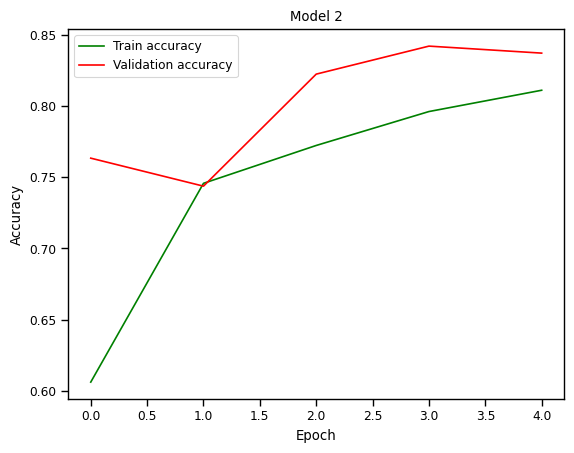

In [10]:
model_2 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    
    
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(0.0001),metrics=["accuracy"])
history_2 = model_2.fit(train_data,epochs=5,validation_data=val_data)

# Plot training and validation accuracy
sns.lineplot(x=history_2.epoch, y=history_2.history["accuracy"], c="green", label="Train accuracy")
sns.lineplot(x=history_2.epoch, y=history_2.history["val_accuracy"], c="red", label="Validation accuracy")
plt.xlabel("Epoch")
plt.title("Model 2")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("docs/model_2.png")
plt.show()

`🧠 - Model 2`: The model performed weaker than *Model 1*

Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 525ms/step - accuracy: 0.8167 - loss: 0.4088 - val_accuracy: 0.8276 - val_loss: 0.3676
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 483ms/step - accuracy: 0.8134 - loss: 0.4059 - val_accuracy: 0.8768 - val_loss: 0.3381
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 492ms/step - accuracy: 0.8327 - loss: 0.3907 - val_accuracy: 0.8768 - val_loss: 0.3395
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 26s 436ms/step - accuracy: 0.8418 - loss: 0.3682 - val_accuracy: 0.8571 - val_loss: 0.3406
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 28s 465ms/step - accuracy: 0.8408 - loss: 0.3726 - val_accuracy: 0.8374 - val_loss: 0.3638


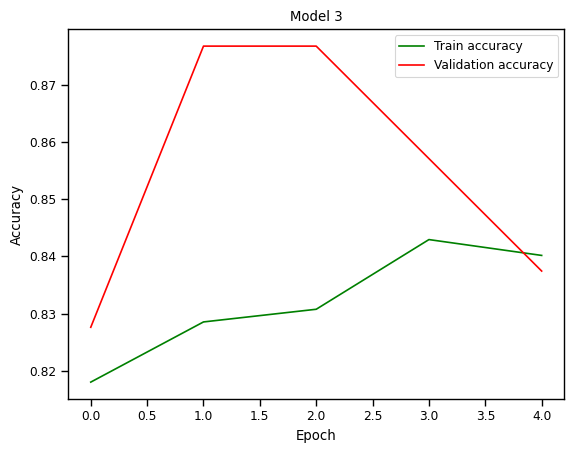

In [11]:
model_3 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    
    
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(0.01),metrics=["accuracy"])
history_3 = model_2.fit(train_data,epochs=5,validation_data=val_data)


# Plot training and validation accuracy
sns.lineplot(x=history_3.epoch, y=history_3.history["accuracy"], c="green", label="Train accuracy")
sns.lineplot(x=history_3.epoch, y=history_3.history["val_accuracy"], c="red", label="Validation accuracy")
plt.xlabel("Epoch")
plt.title("Model 3")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("docs/model_3.png")
plt.show()

`🧠 - Model 3`: Performed nearly like *Model 1*

In [12]:
train_accuracy = history_1.history["accuracy"]
val_accuracy = history_1.history["val_accuracy"]

df = pd.DataFrame({
    "Epoch": range(1, len(train_accuracy) + 1),  
    "Train Accuracy": train_accuracy,
    "Validation Accuracy": val_accuracy})
print(f"Train accuracy: {np.mean(train_accuracy[-4:-1]):0.4f}")
print(f"Validation accuracy: {np.mean(val_accuracy[-4:-1]):0.4f}")
df

Train accuracy: 0.8400
Validation accuracy: 0.8818


,Epoch,Train Accuracy,Validation Accuracy
0,1,0.711987,0.827586
1,2,0.824084,0.866995
2,3,0.833518,0.896552
3,4,0.862375,0.881773
4,5,0.884573,0.871921


In [13]:
train_accuracy = history_2.history["accuracy"]
val_accuracy = history_2.history["val_accuracy"]

df = pd.DataFrame({
    "Epoch": range(1, len(train_accuracy) + 1), 
    "Train Accuracy": train_accuracy,
    "Validation Accuracy": val_accuracy})
print(f"Train accuracy: {np.mean(train_accuracy[-4:-1]):0.4f}")
print(f"Validation accuracy: {np.mean(val_accuracy[-4:-1]):0.4f}")
df

Train accuracy: 0.7716
Validation accuracy: 0.8030


,Epoch,Train Accuracy,Validation Accuracy
0,1,0.605993,0.763547
1,2,0.745838,0.743842
2,3,0.772475,0.822660
3,4,0.796337,0.842365
4,5,0.811321,0.837438


In [14]:
train_accuracy = history_3.history["accuracy"]
val_accuracy = history_3.history["val_accuracy"]

df = pd.DataFrame({
    "Epoch": range(1, len(train_accuracy) + 1),  
    "Train Accuracy": train_accuracy,
    "Validation Accuracy": val_accuracy})
print(f"Train accuracy: {np.mean(train_accuracy[-4:-1]):0.4f}")
print(f"Validation accuracy: {np.mean(val_accuracy[-4:-1]):0.4f}")
df

Train accuracy: 0.8341
Validation accuracy: 0.8703


,Epoch,Train Accuracy,Validation Accuracy
0,1,0.817980,0.827586
1,2,0.828524,0.876847
2,3,0.830744,0.876847
3,4,0.842952,0.857143
4,5,0.840178,0.837438


#### So `Model 1` was the most stable and accurate model. Using `Model 1` as the `Final Model` 

In [15]:
final_model = model_1

## Prediction & final check

In [16]:
class_names = ['pizza','steak']

def pred_and_plot(model, filename, class_names,img_shape=224):
    
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)
  print(pred)
    
  save_path = f"docs/{filename.split('/')[-1]}"
  plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
[[0.9962267]]


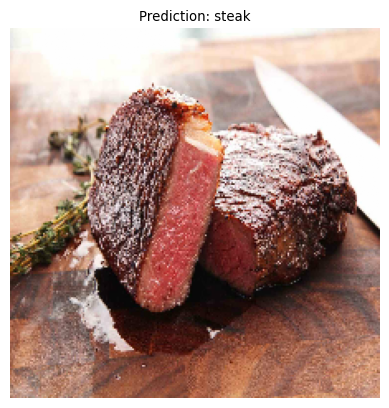

In [17]:
pred_and_plot(final_model, "final_check/steak.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[0.2236479]]


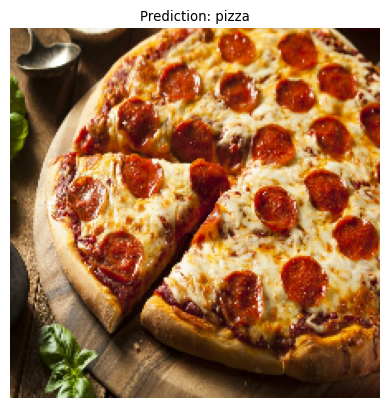

In [18]:
pred_and_plot(final_model, "final_check/pizza.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.96521777]]


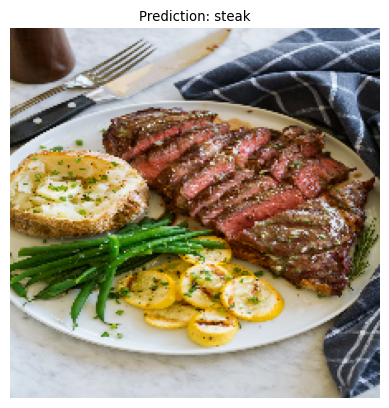

In [19]:
pred_and_plot(final_model, "final_check/steak2.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.0107693]]


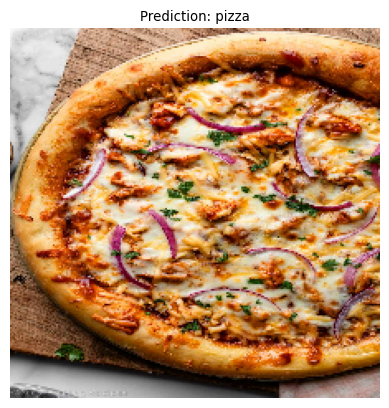

In [20]:
pred_and_plot(final_model, "final_check/pizza2.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.33910584]]


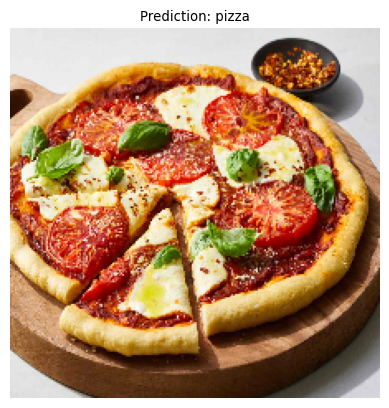

In [26]:
pred_and_plot(final_model, "final_check/pizza3.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.9981877]]


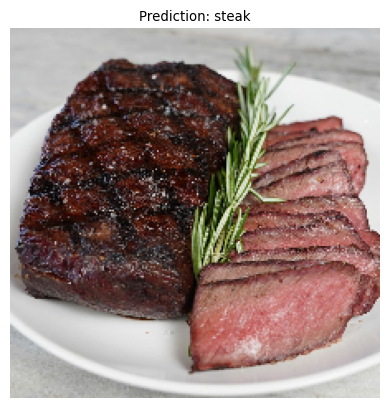

In [28]:
pred_and_plot(final_model, "final_check/steak3.jpg", class_names)

## Saving Model for future tuning

In [24]:
model_1.save("final_model/final_model.keras")

## Results

`Final Model`  predictions: **True✅**, **True✅**, **True✅**, **True✅**

`Final Model`  prediction probability: **97%✅**, **64%✅**, **77%✅**, **97%✅**

# Saving whole session to a pkl

# Made with ☕ & ❤️ by Matin Rasoulzad

- **linkedin:** https://www.linkedin.com/in/matin-rasoulzad/
- **Github:** https://github.com/Matin-Rasoulzad